# Splot

Funkcja splotu jest podana wzorem:

$(f * g)(m) = \sum_{n=1}^{N}f(n)g(m-n)$ &nbsp;&nbsp;&nbsp;&nbsp; dla $m=1..M$

Gdzie N to długość sygnału N, a M wynikowego sygnału. Zaimplementuj daną funkcję używając wyłącznie podstawowych operatrów oraz pętli *for*. Porównaj czas działania swojej funkcji z wbudowaną funkcją *numpy.convolve*.

In [19]:
%pylab inline
L = 10 # dlugosc g
N = 5 #glugosc f
f = np.random.random(N)
g = np.random.random(L)
M = L + N - 1 #dlugosc splotu
h = np.zeros(M)
def function():
    for i in range(N):
        for j in range(M):
            if j-i>=0 and j-i<L:
                h[j] += f[i] * g[j-i]
%time function()
print(h)
print(np.convolve(f,g))

Populating the interactive namespace from numpy and matplotlib
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 74.6 µs
[  8.35792996e-04   3.73522913e-02   2.78972905e-01   3.08752306e-01
   8.92367052e-01   1.58239584e+00   1.71009024e+00   1.64820093e+00
   1.20257105e+00   1.17572418e+00   1.05031445e+00   8.17501249e-01
   5.08884554e-01   9.10418096e-02]
[  8.35792996e-04   3.73522913e-02   2.78972905e-01   3.08752306e-01
   8.92367052e-01   1.58239584e+00   1.71009024e+00   1.64820093e+00
   1.20257105e+00   1.17572418e+00   1.05031445e+00   8.17501249e-01
   5.08884554e-01   9.10418096e-02]


/usr/local/lib/python3.4/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Odpowiedź impulsowa

Wygeneruj funkcję $g$ o długości 10, używając losowo wybranych przez siebie liczb. Jako funkcję $f$ użyj delty Kroneckera o długości 100 próbek. Jaki jest wynik splotu tych dwóch sygnałów? Zwróć uwagę na wzór i implementację funkcji splotu i zastanów się dlaczego tak jest.

In [20]:
N = 100
M = 10
f = np.random.random(N)
g = np.random.random(M)
h = np.zeros(M)
print(f)
print(g)

[ 0.35712485  0.03081718  0.03016857  0.69307228  0.3885731   0.01853037
  0.87835182  0.19592333  0.63121269  0.78983581  0.69236695  0.53488845
  0.56194244  0.37065461  0.65352845  0.4142616   0.46962381  0.06721315
  0.87575295  0.62925284  0.97541644  0.49706537  0.63606669  0.70326769
  0.03346489  0.00705883  0.91263321  0.00719973  0.64293304  0.50323863
  0.2838679   0.51454302  0.08749872  0.40651207  0.57644155  0.95151948
  0.14402748  0.95714138  0.44172821  0.60281149  0.86231593  0.8541016
  0.9963779   0.78375587  0.31200768  0.5869098   0.3980881   0.53257381
  0.30934781  0.45386852  0.61240757  0.24777111  0.14543673  0.07999824
  0.3947154   0.12987144  0.71039818  0.40604944  0.04283247  0.75270995
  0.53721093  0.56621577  0.64651919  0.83911786  0.91161398  0.7566764
  0.98035352  0.60321421  0.16867105  0.25932846  0.63219799  0.56563004
  0.13763516  0.41031957  0.58380489  0.57235318  0.74229803  0.65891966
  0.16004338  0.11935844  0.77990346  0.61459086  0.5

## Pogłos spolotowy

Innym zastosowaniem odpowiedzi impulsowej jest bardziej kreatywny. Możemy nałożyć charakterystykę danego pomieszczenia na nudny sygnał nagrany w studiu, żeby mu nadać więcej *charakteru*. Wczytaj bazę danych odpowiedzi impulsowej AIR, którą możesz pobrać ze strony poniżej:

http://www.ind.rwth-aachen.de/en/research/tools-downloads/aachen-impulse-response-database/

Pliki w bazie danych są zapisane w formacie Matlaba. Łatwo je można wczytać używając metody *scipy.io.loadmat*. Po wczytaniu pliku z bazy danych, element słownika *h_air* zawiera odpowiedź impulsową, a *air_info* podstawowe informacje o nagraniu. Odtwórz wybrany impuls.

Zrób proste nagranie (albo użyj gotowe) i wykonaj splot z jedną z funkcji podanych w bazie (im większe pomieszczenie, tym bardziej słyszalny efekt). Zwróć uwagę żeby częstotliwość próbkowania sygnału jaki chcesz zmodyfikować oraz impulsu były takie same! Możesz użyć funkcji *scipy.signal.resample* aby skorygować jeden z sygnałów. Uważaj, bo liczenie splotu długich sygnałów może trwać bardzo długo!

Procedura ta nadaje więcej *echa* nagraniu. Takie echo jest znane również jako *pogłos* (ang. reverb). Jest wiele metod generowania pogłosu w nagraniu. Metoda, którą my użyliśmy nazwya się *pogłos splotowy* (ang. convolution reverb).

48000
[194 194 197 ...,  65  65  65]


(24000,)


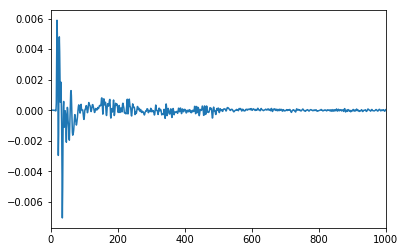

In [21]:
from IPython.display import display,Audio
from scipy.io.wavfile import read
fs,y = read('zdanie.wav')
print(fs)
print(y)
display(Audio(y, rate = fs))
from scipy.io import loadmat
m = loadmat('AIR_1_4/air_phone_stairway_hhp_0.mat')
h=m['h_air'].flatten()
#print((h.size)/fs)
h=h[:(fs//2)]
print(h.shape)
plot(h)
xlim(0,1000)
display(Audio(h, rate = fs))
g = np.convolve(y, h)
display(Audio(g, rate = fs))

# Praca domowa

Zdefiniuj dowolne wzory albo funkcje dla dwóch przykładowych sygnałów $f_1$ i $f_2$ w następujący sposób:
```
def f(x):
    return x**2+1
x=np.linspace(-10,10,100)
plot(x,f(x))
```

Zdefiniuj funkcję $f_s$ która jest sumą ważoną dwóch powyższych funkcji (dla $k_1$ i $k_2$ użyj dowolnych wartości):

\begin{equation}
f_s(x)=k_1\cdot f_1(x) + k_2\cdot f_2(x)
\end{equation}

Zdefiniuj dwie następujące układy jako funkcję, którę jako argumenty przyjmują zrówno funkcję $f$ jak i jej wartości $x$:

  1. $H_1(f,x)=f(2x)$
  2. $H_2(f,x)=(f(x))^2$
  
Użyj twierdzenie o liniowości, żeby empirycznie sprawdzić czy układy te są liniowe, czy nie. Dla przypomnienia, dla układu liniowego powinno wyjść:

\begin{equation}
H(f_s,x) = k_1 \cdot H(f_1,x) + k_2 \cdot H(f_2,x)
\end{equation}

Populating the interactive namespace from numpy and matplotlib


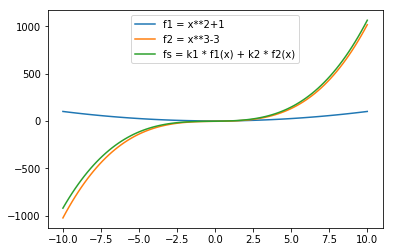

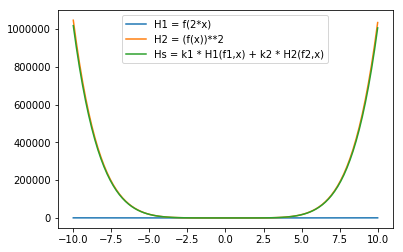

In [25]:
%pylab inline
def f1(x):
    return x**2+1

def f2(x):
    return x**3+x*2-3

x=np.linspace(-10,10,100)
plt.figure()
plt.plot(x, f1(x), x, f2(x))
k1 = np.random.random()
k2 = np.random.random()

def fs(f1, f2):
    return k1 * f1(x) + k2 * f2(x)

plt.plot(x,fs(f1, f2))
plt.legend(('f1 = x**2+1', 'f2 = x**3-3', 'fs = k1 * f1(x) + k2 * f2(x)') ,loc='upper center')

def H1(f,x):
    return f(2*x)
def H2(f,x):
    return (f(x))**2
def Hs(f1, f2, x):
    return k1 * H1(f1,x) + k2 * H2(f2,x)

plt.figure()
plt.plot(x, H1(f1, x), x, H2(f2, x), x, Hs(f1, f2, x))
plt.legend(('H1 = f(2*x)', 'H2 = (f(x))**2', 'Hs = k1 * H1(f1,x) + k2 * H2(f2,x)'),loc='upper center')
# ponieważ H(fs,x)!=k1⋅H(f1,x)+k2⋅H(f2,x) , to te układy nie są liniowe.